In [1]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_dir = pathlib.Path('flower_photos')

In [3]:
batch_size = 32
img_width = 180
img_height = 180

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset='training',
    seed = 123,
    image_size = (img_height, img_width),
    batch_size=batch_size)
    

Found 3671 files belonging to 5 classes.
Using 2937 files for training.


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset='validation',
    seed = 123,
    image_size = (img_height, img_width),
    batch_size=batch_size)

Found 3671 files belonging to 5 classes.
Using 734 files for validation.


In [6]:
class_names = train_ds.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [7]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
num_classes = len(class_names)

In [26]:
model = Sequential([
        layers.Rescaling(1/255, input_shape=(img_height, img_width, 3)),
        
        #Augmentation
        layers.RandomFlip('horizontal', input_shape = (img_height, img_width, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
        layers.RandomContrast(0.2),

        #Convolution
        layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
        layers.MaxPooling2D(),
    
        layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
        layers.MaxPooling2D(),

        layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
        layers.MaxPooling2D(),

        #Regularization
        layers.Dropout(0.2),
    
        layers.Flatten(),
        layers.Dense(128, activation = 'relu'),
        layers.Dense(num_classes)
])

model.compile(
    optimizer = 'adam',
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    metrics = ['accuracy']
)

In [27]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip_3 (RandomFlip)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_3 (RandomRotation)   │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_3 (RandomZoom)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_contrast_3 (RandomContrast)   │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
epochs=30
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 136ms/step - accuracy: 0.4018 - loss: 1.3776 - val_accuracy: 0.5749 - val_loss: 1.0487
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 136ms/step - accuracy: 0.6165 - loss: 1.0018 - val_accuracy: 0.5668 - val_loss: 1.0877
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.6302 - loss: 0.9332 - val_accuracy: 0.6526 - val_loss: 0.8706
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - accuracy: 0.6914 - loss: 0.8218 - val_accuracy: 0.6594 - val_loss: 0.8698
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - accuracy: 0.7076 - loss: 0.7782 - val_accuracy: 0.7112 - val_loss: 0.7878
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - accuracy: 0.7339 - loss: 0.7128 - val_accuracy: 0.6894 - val_loss: 0.7995
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - accuracy: 0.7248 - loss: 0.7253 - val_accuracy: 0.7248 - val_loss: 0.7653
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 128ms/step - accuracy: 0.7466 - loss: 0.6697 - val_accu

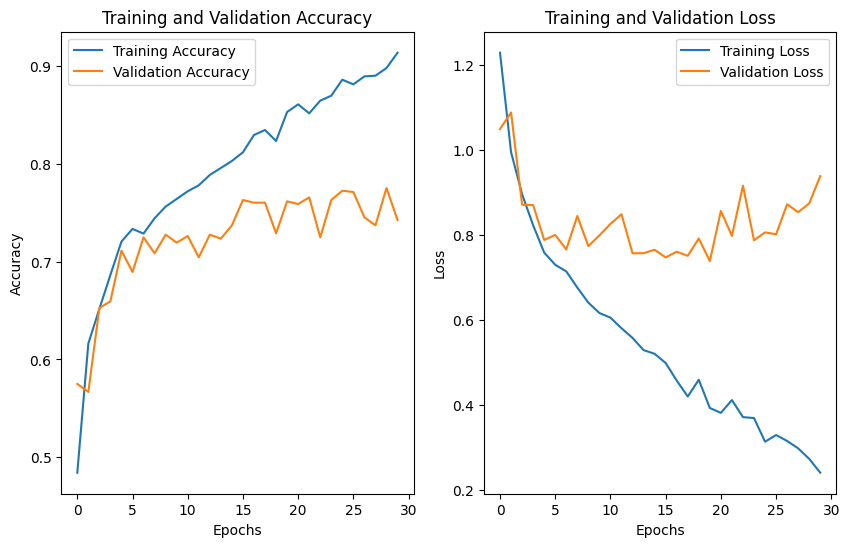

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

axes[0].plot(epochs_range, acc, label='Training Accuracy')
axes[0].plot(epochs_range, val_acc, label='Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend() 
axes[0].set_title('Training and Validation Accuracy')

axes[1].plot(epochs_range, loss, label='Training Loss')
axes[1].plot(epochs_range, val_loss, label='Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].set_title('Training and Validation Loss')

plt.show()

In [30]:
model.save_weights('my_flowers_model.weights.h5')

In [31]:
model.load_weights('my_flowers_model.weights.h5')

In [32]:
loss, acc = model.evaluate(train_ds, verbose = 2)
print(f'accuracy: {acc}')

92/92 - 2s - 27ms/step - accuracy: 0.9374 - loss: 0.1796
accuracy: 0.9373510479927063


In [44]:
img = keras.utils.load_img('../../Ando/images2/sunflower3.jpg', target_size=(img_height, img_width))

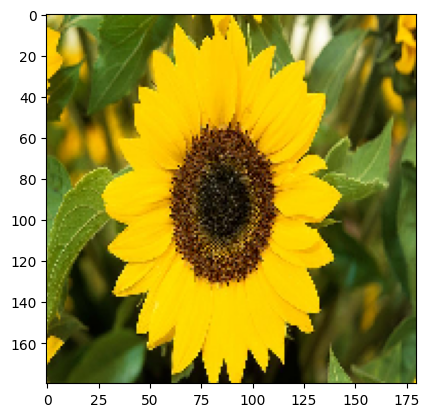

In [45]:
plt.imshow(img)

In [46]:
img_array = keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

In [47]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [48]:
print(f"The image shows {class_names[np.argmax(score)]} ({round(np.max(score) * 100, 2)}% probablity)")

The image shows sunflowers (99.97% probablity)
